In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

CUSTOM_FORMAT = {"with_labels" : False,
                "node_size": 20, "node_color": "#ff0000", "edgecolors": "#911a07",
                "width": 0.4, "edge_color": "black"}

In [17]:
with open(r"C:\Users\juanm\OneDrive\Documentos\GitHub\CoNet\Tp Final\network_building\status_files\dependencies.dict", "rb") as f:
    dependencies = pickle.load(f)

try:
    with open(r"C:\Users\juanm\OneDrive\Documentos\GitHub\CoNet\Tp Final\network_building\status_files\links.list", "rb") as f:
        links = pickle.load(f)

except:
    links = []
    for package_name, package_dependencies in dependencies.items():
        package_links = [(d, package_name) for d in package_dependencies]
        links += package_links

    with open(r"C:\Users\juanm\OneDrive\Documentos\GitHub\CoNet\Tp Final\network_building\status_files\links.list", "wb") as f:
        pickle.dump(links, f)


In [18]:
G = nx.DiGraph(links)
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#nx.draw(G, ax = ax, **CUSTOM_FORMAT)
#plt.savefig("Red 9 oct.png", dpi = 300)

Text(0.01, 0.9, '$k_{out}$')

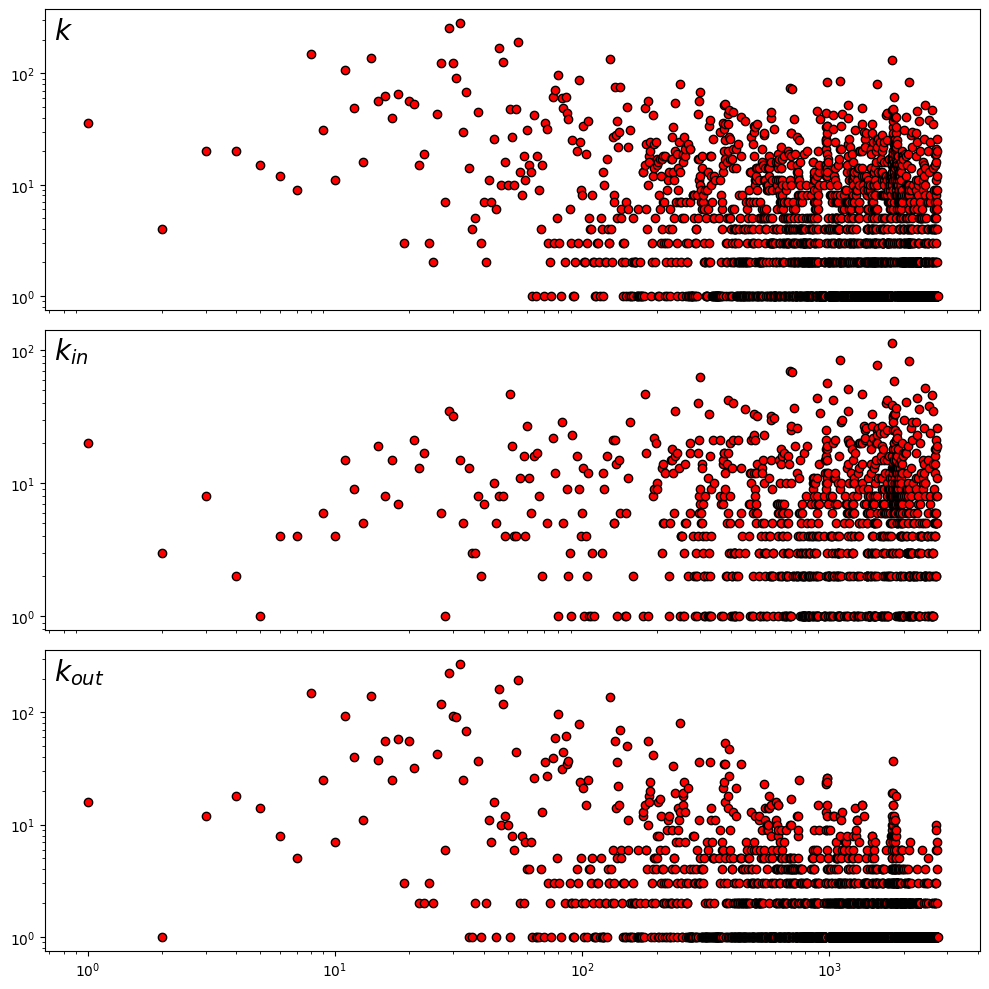

In [20]:
from collections import Counter

fig, ax = plt.subplots(3, 1, figsize=(10, 10), tight_layout = True)

degree = dict(G.degree())
degree_dist = dict(Counter(degree))
ax[0].scatter(degree_dist.keys(), degree_dist.values(), ec = "black", color = "red")

degree = dict(G.in_degree())
degree_dist = dict(Counter(degree))
ax[1].scatter(degree_dist.keys(), degree_dist.values(), ec = "black", color = "red")

degree = dict(G.out_degree())
degree_dist = dict(Counter(degree))
ax[2].scatter(degree_dist.keys(), degree_dist.values(), ec = "black", color = "red")

for i in range(3):
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].text(0.01, 0.9, "$k$", transform = ax[0].transAxes, fontsize = 20)
ax[1].text(0.01, 0.9, "$k_{in}$", transform = ax[1].transAxes, fontsize = 20)
ax[2].text(0.01, 0.9, "$k_{out}$", transform = ax[2].transAxes, fontsize = 20)